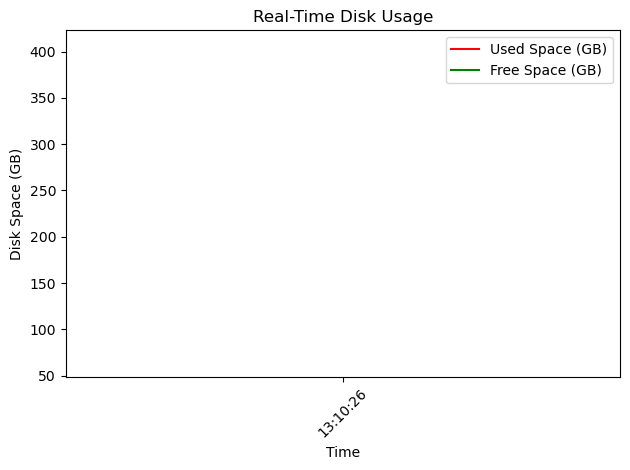

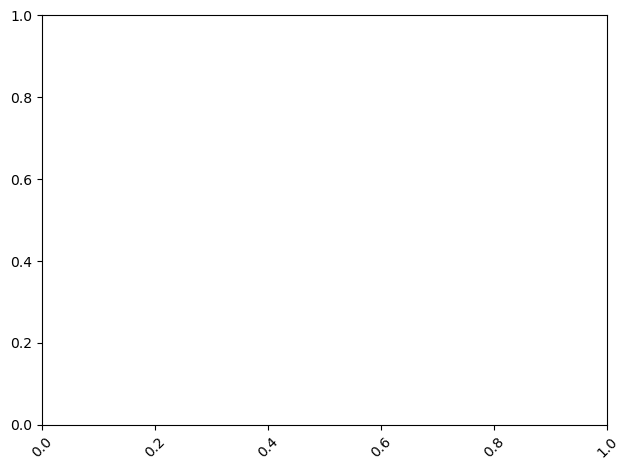

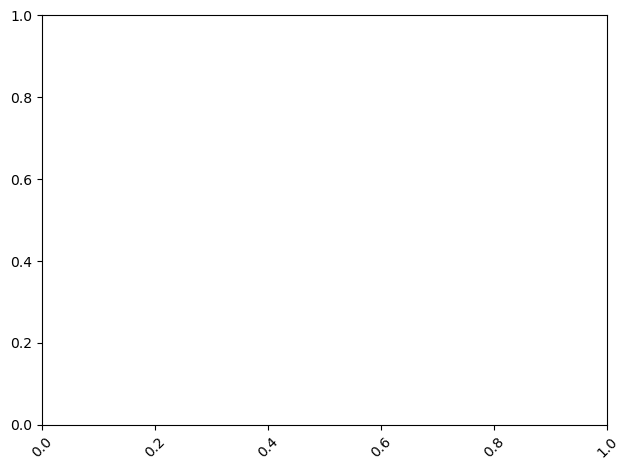

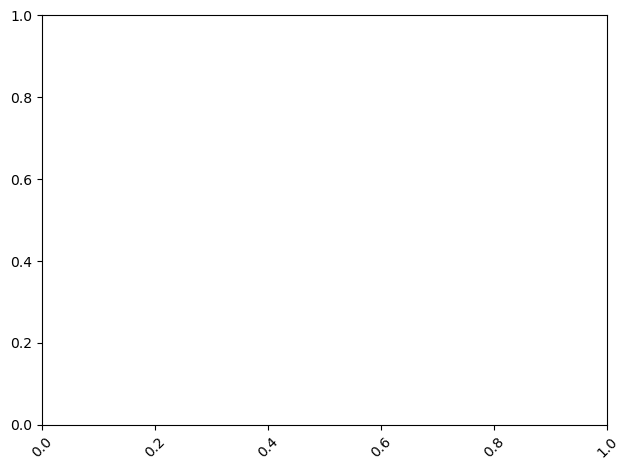

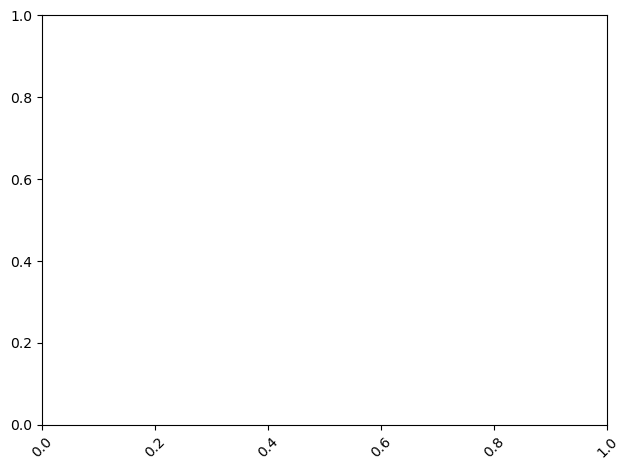

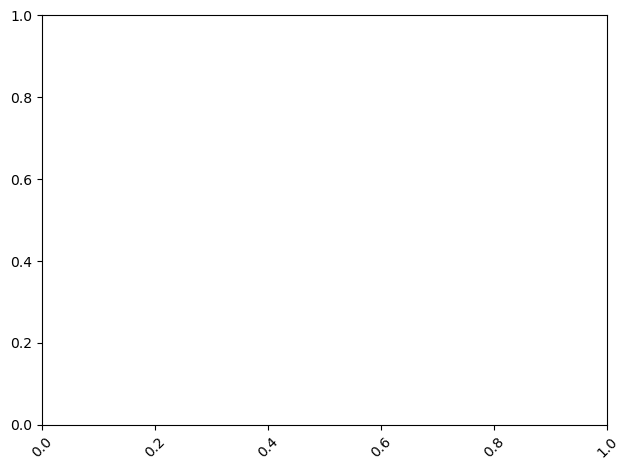

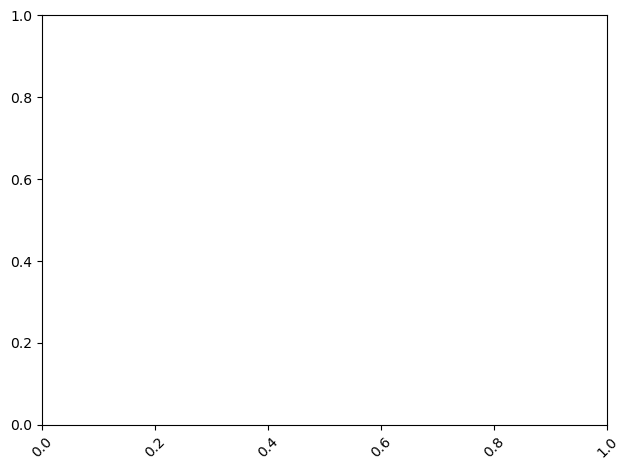

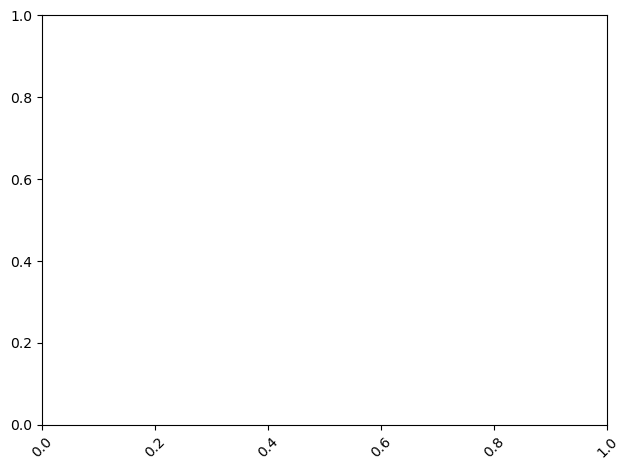

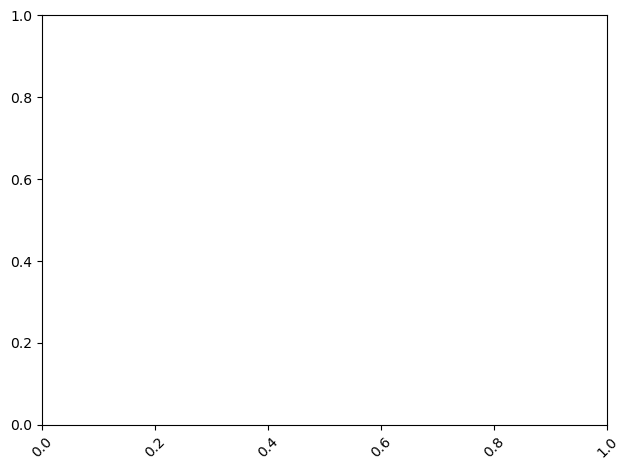

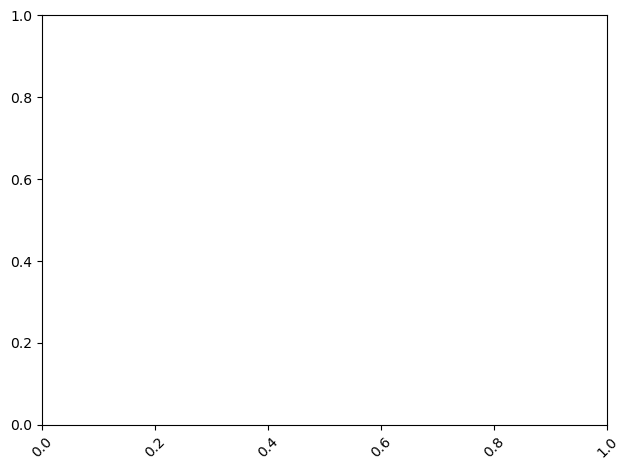

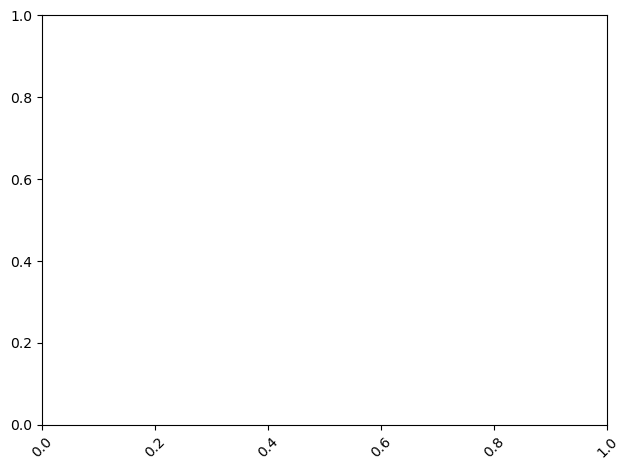

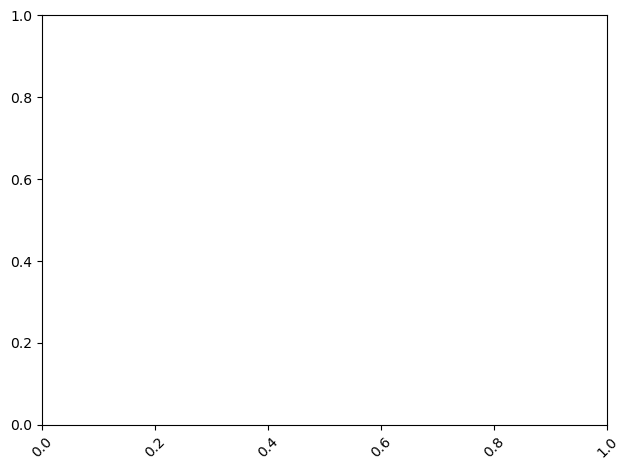

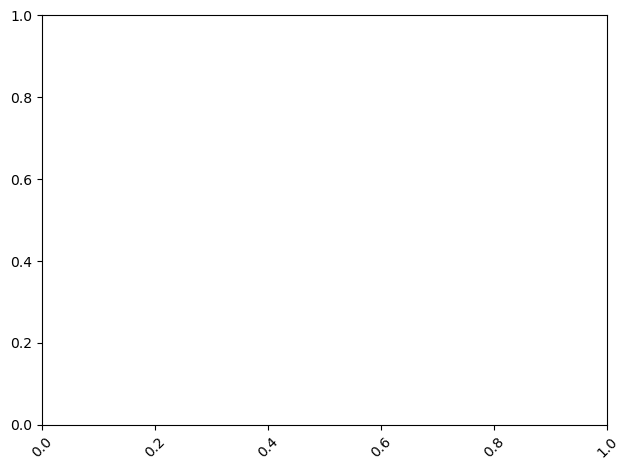

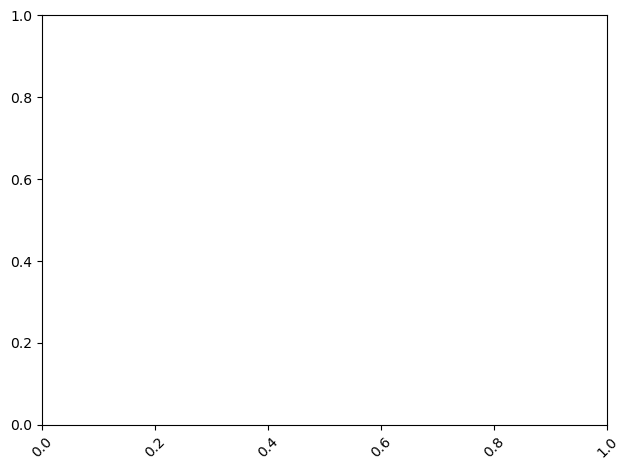

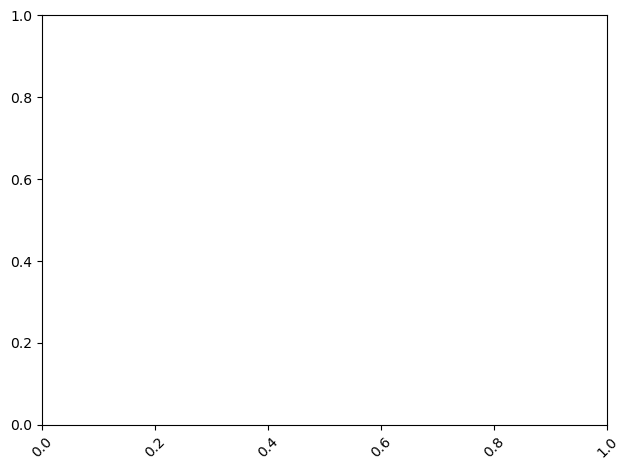

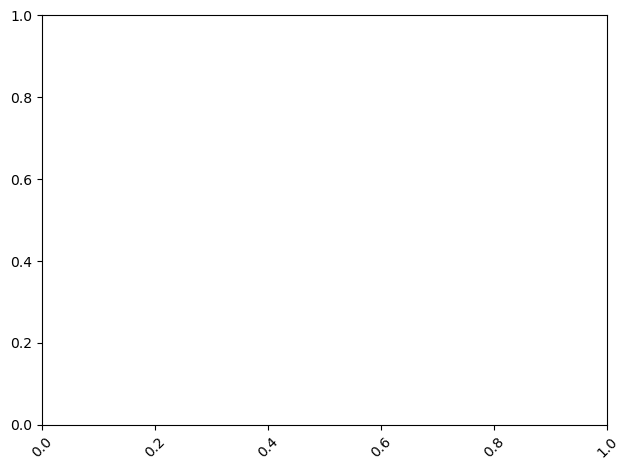

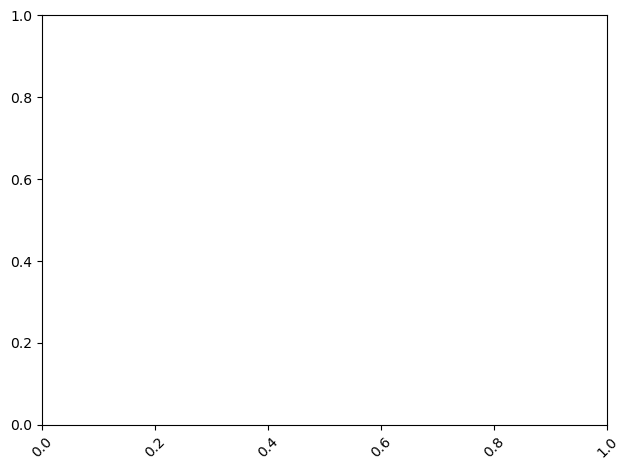

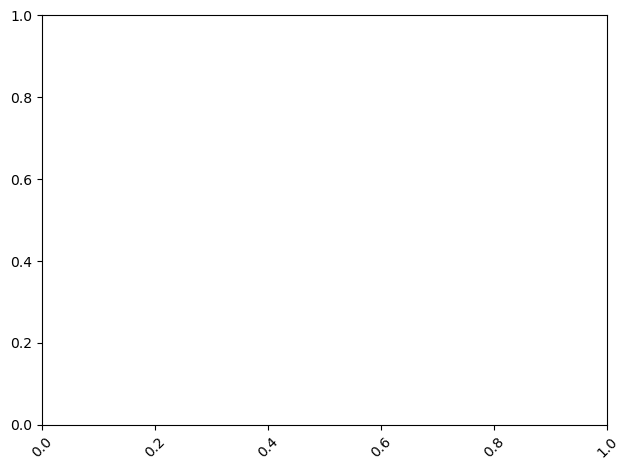

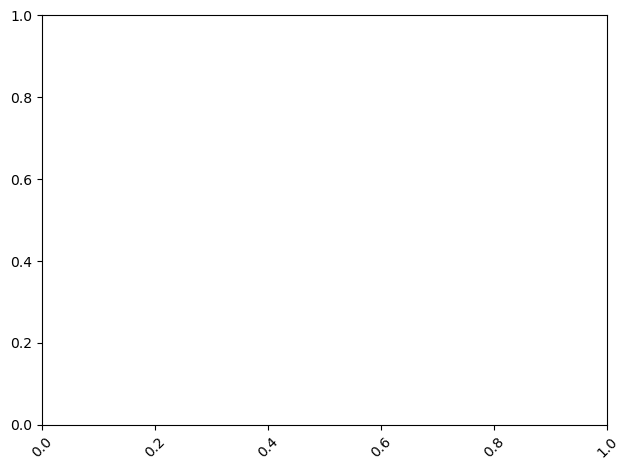

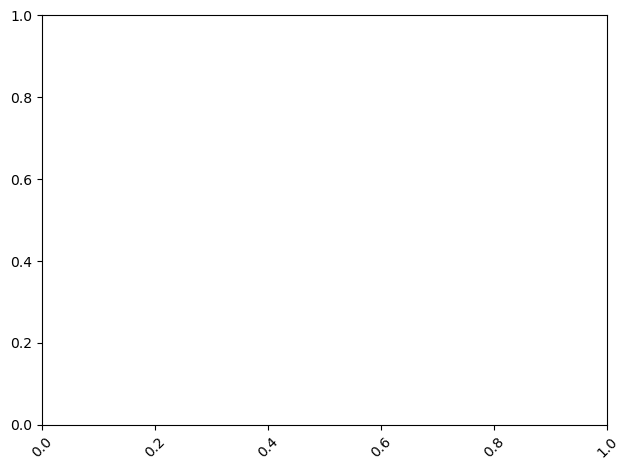

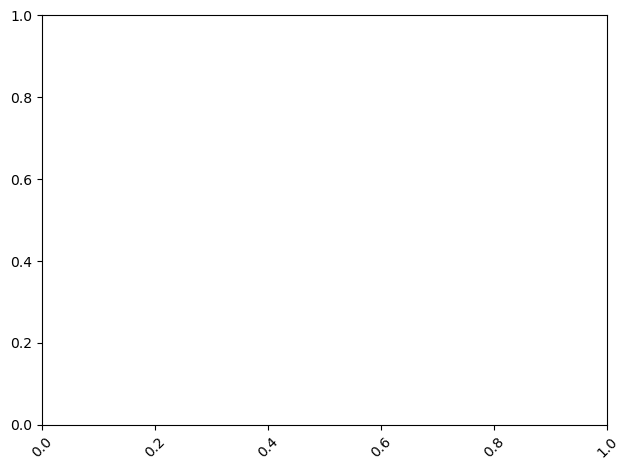

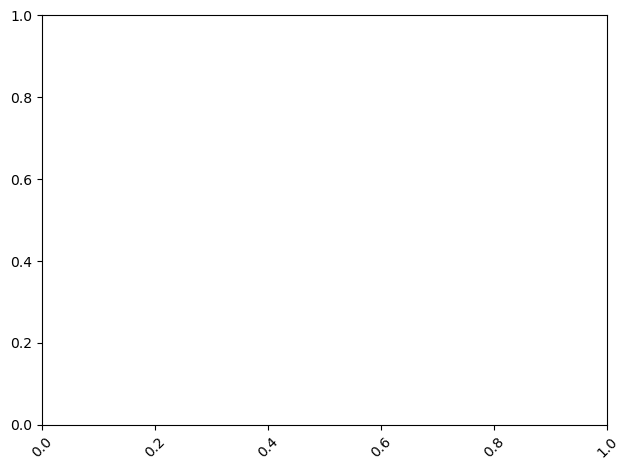

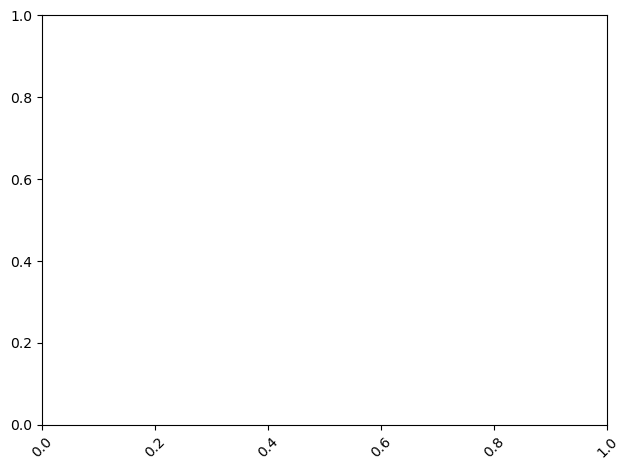

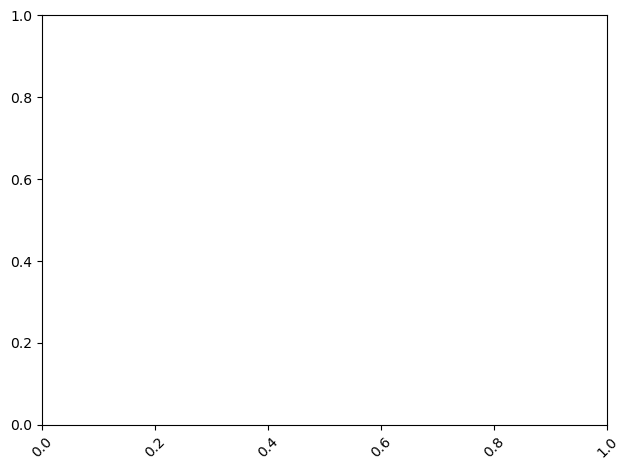

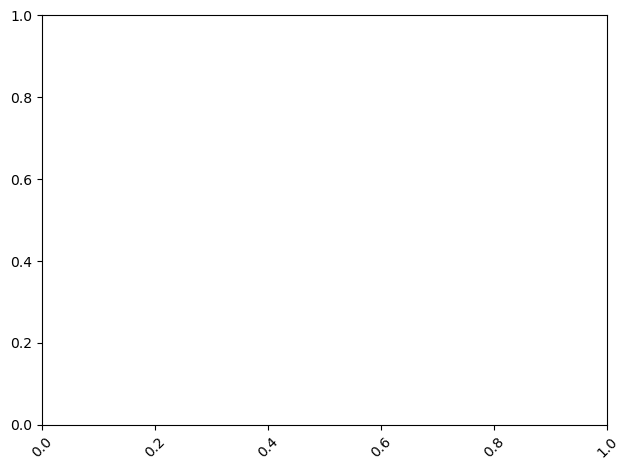

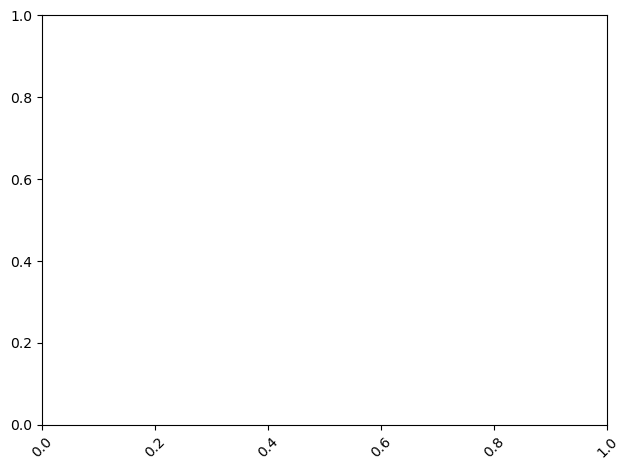

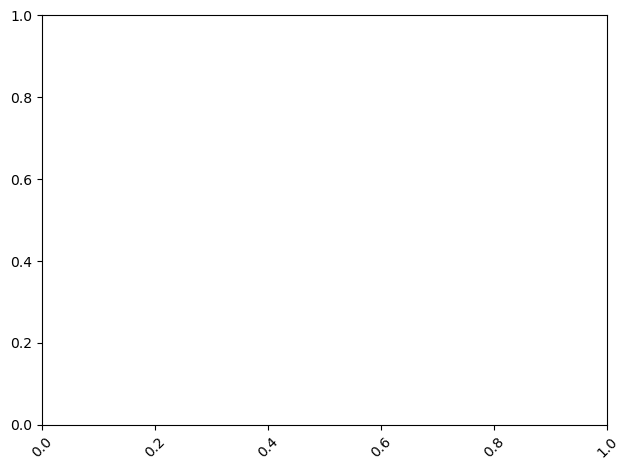

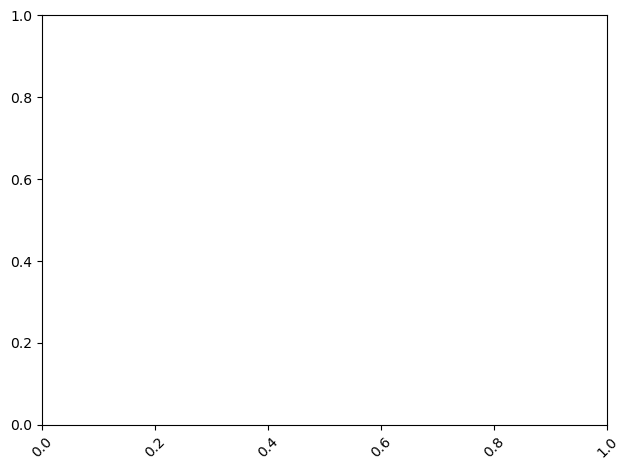

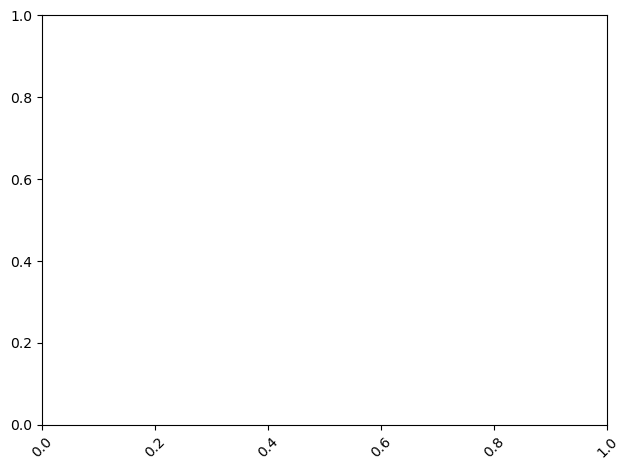

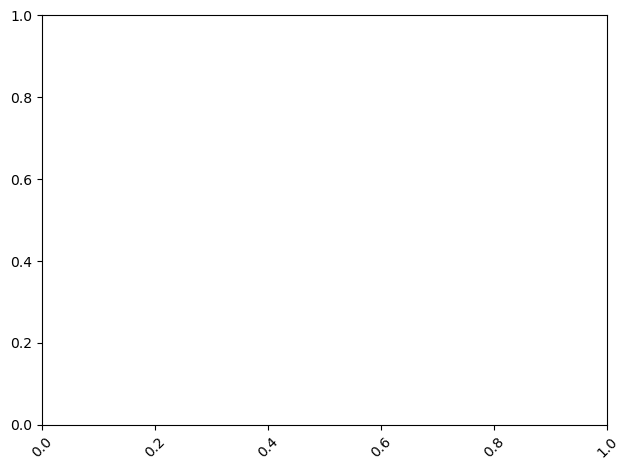

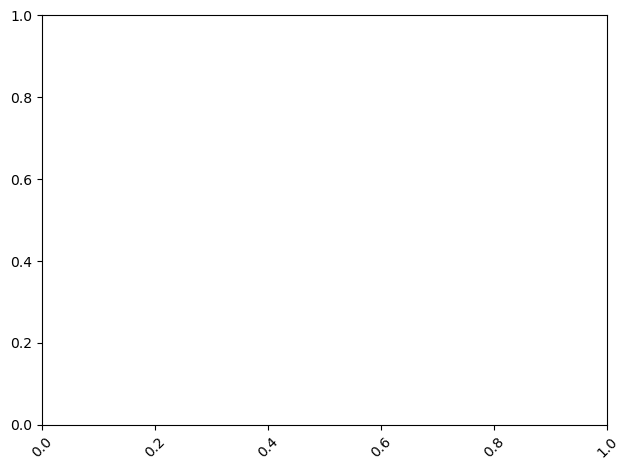

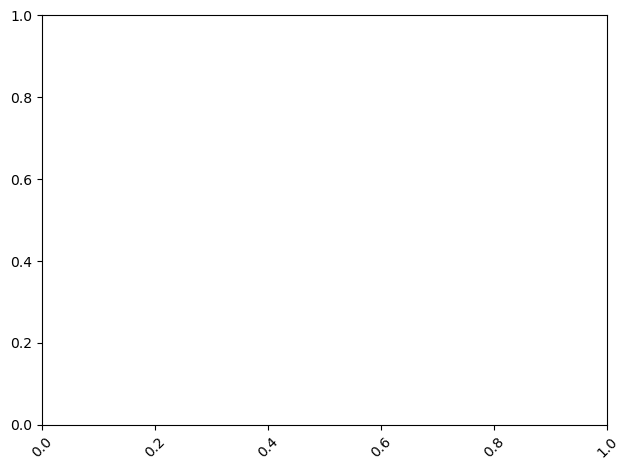

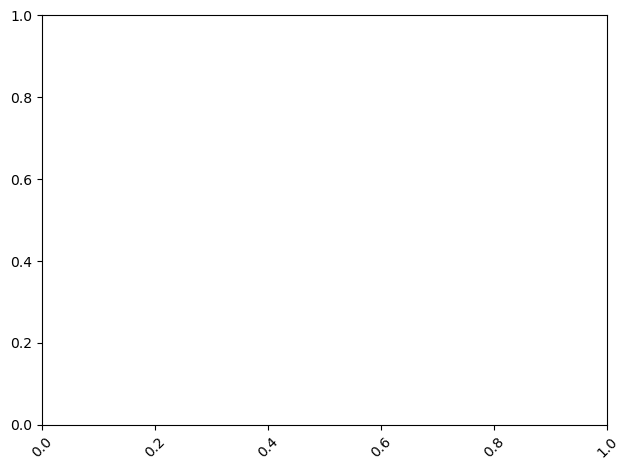

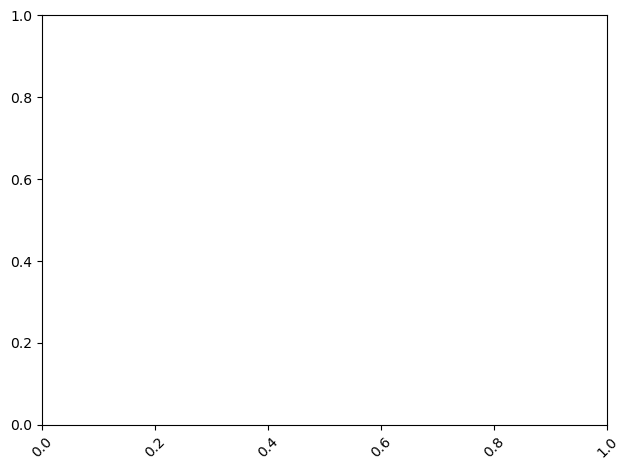

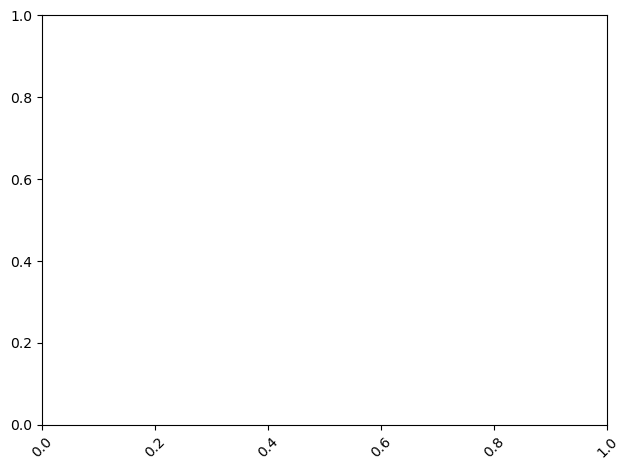

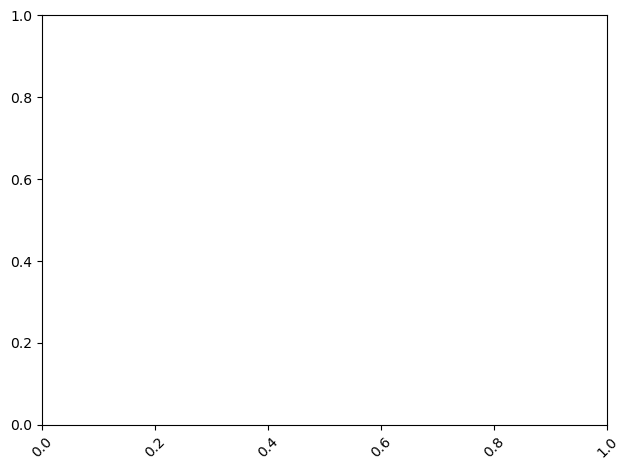

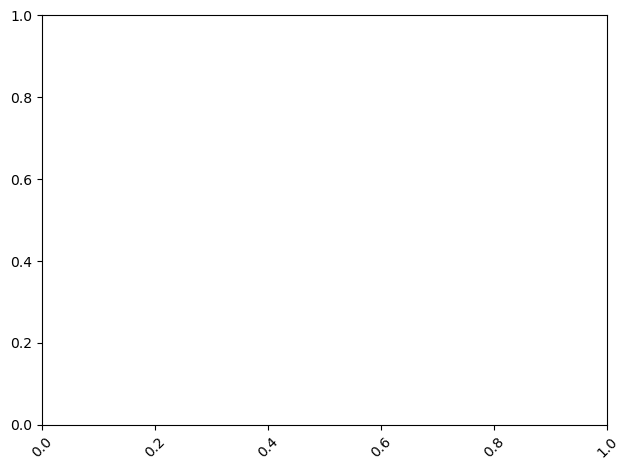

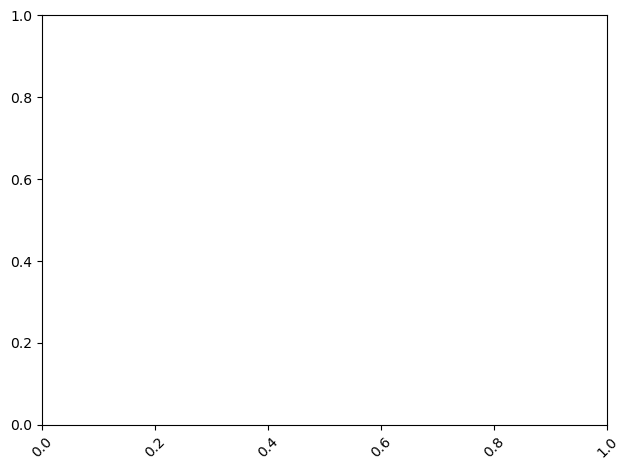

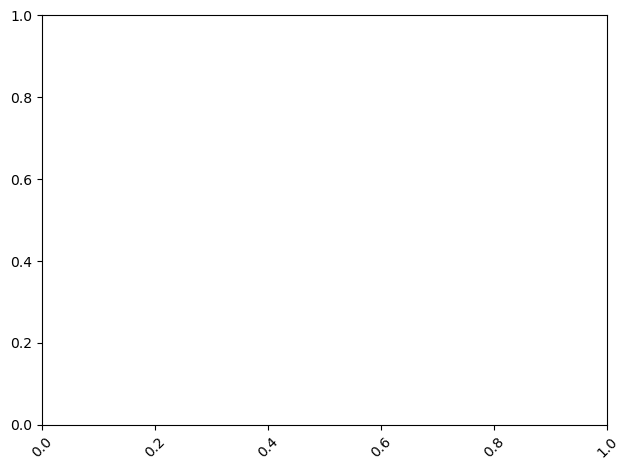

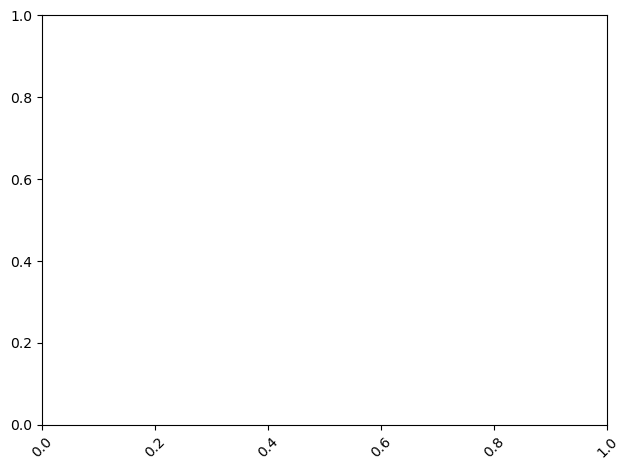

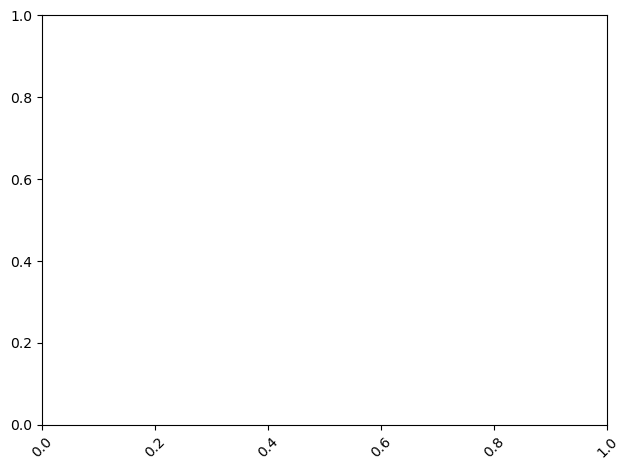

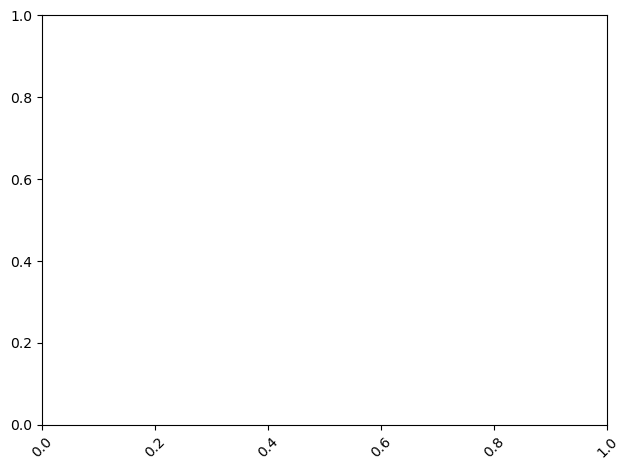

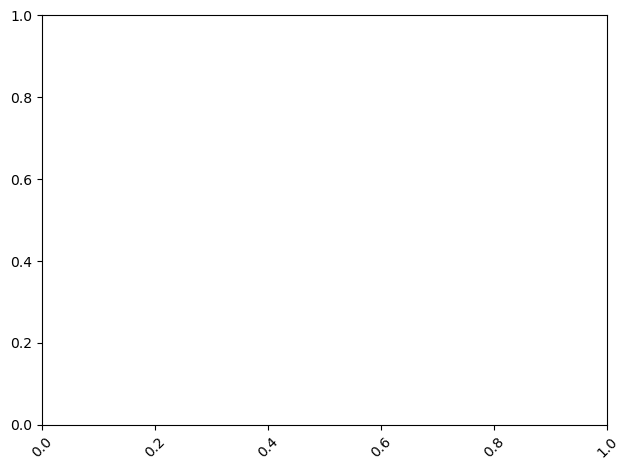

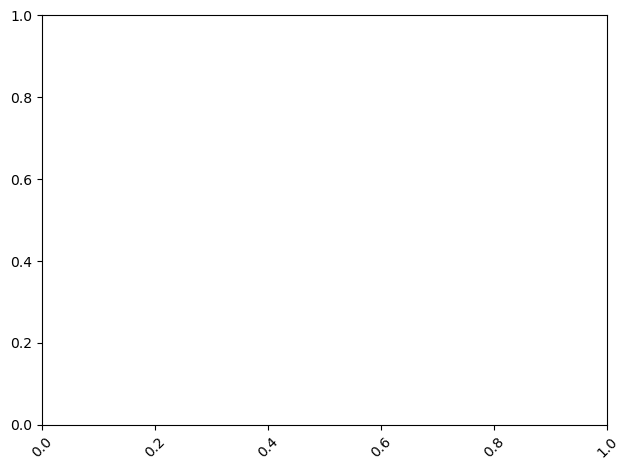

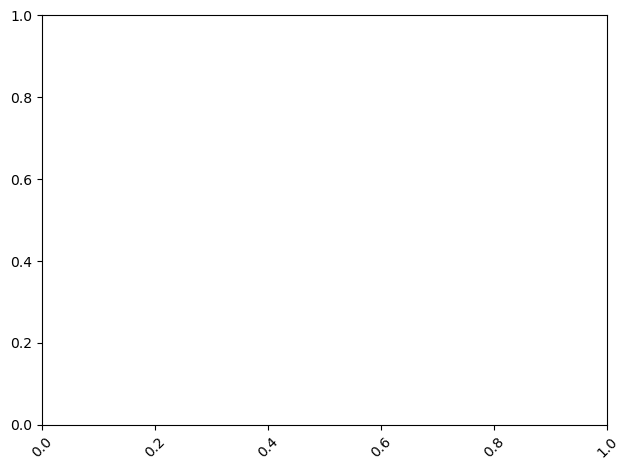

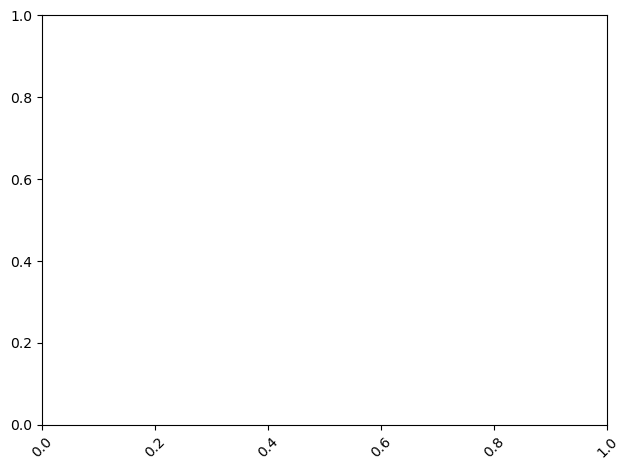

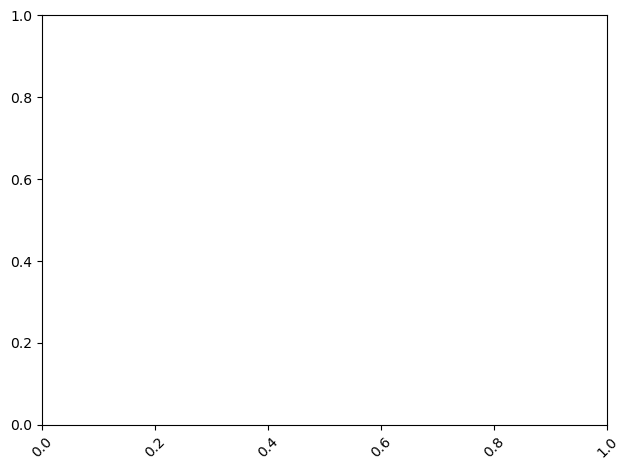

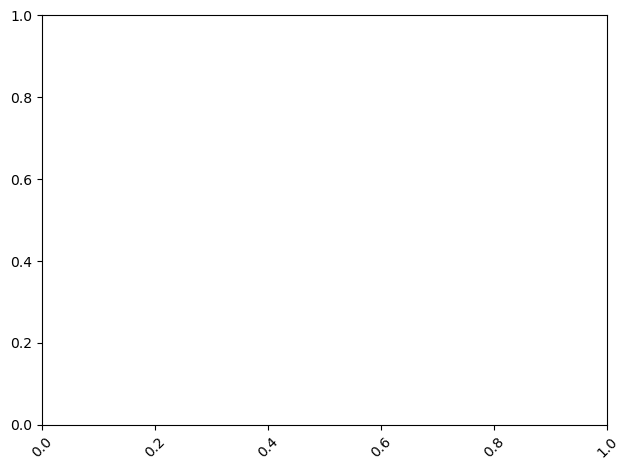

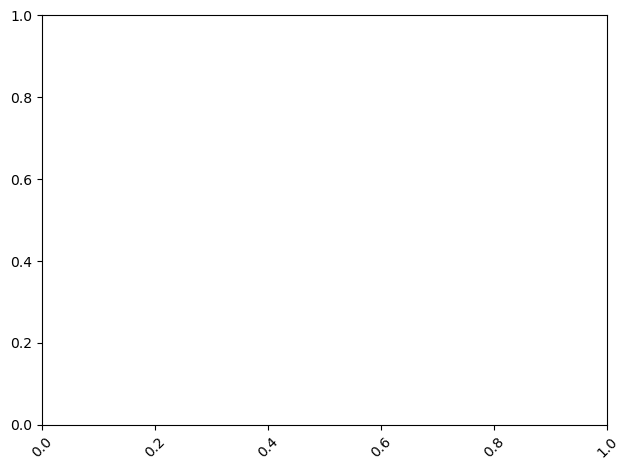

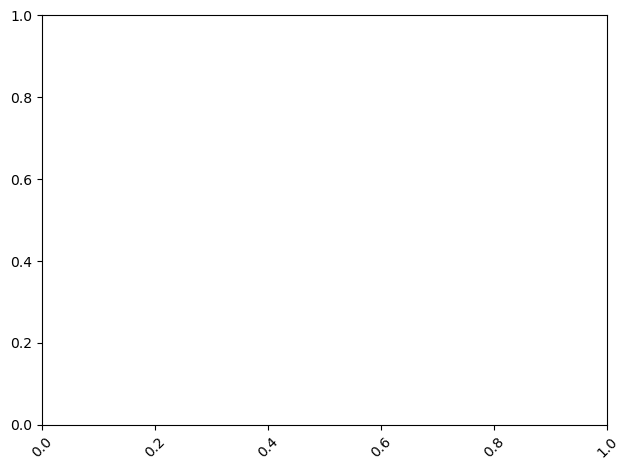

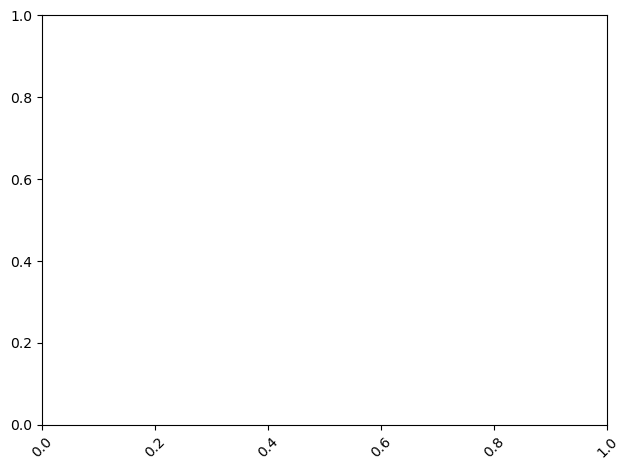

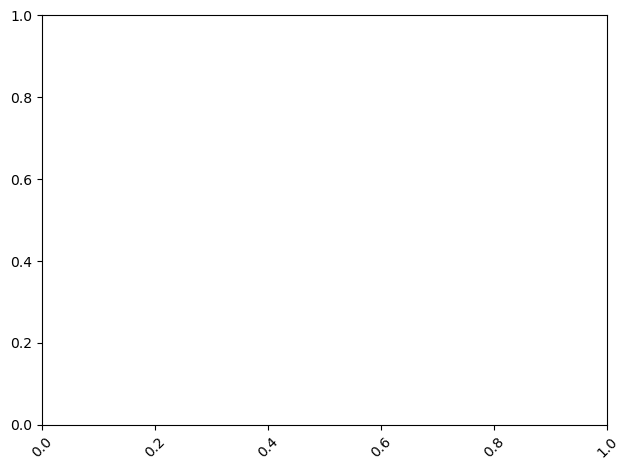

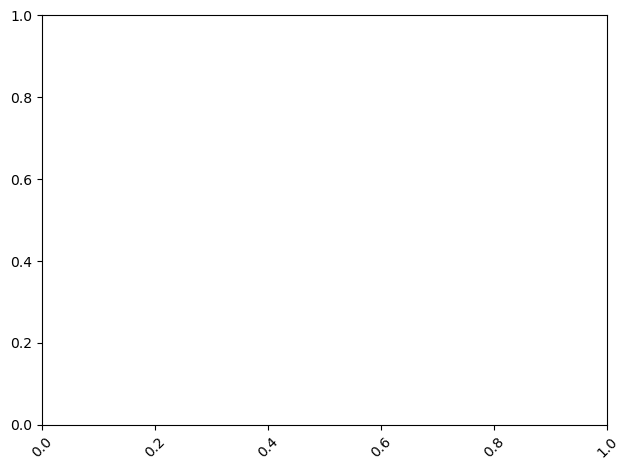

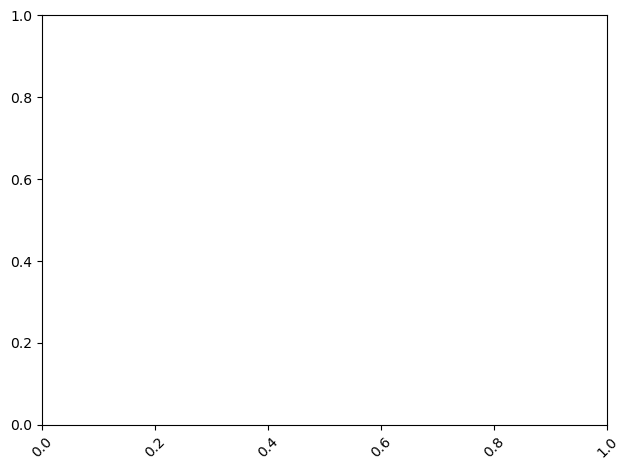

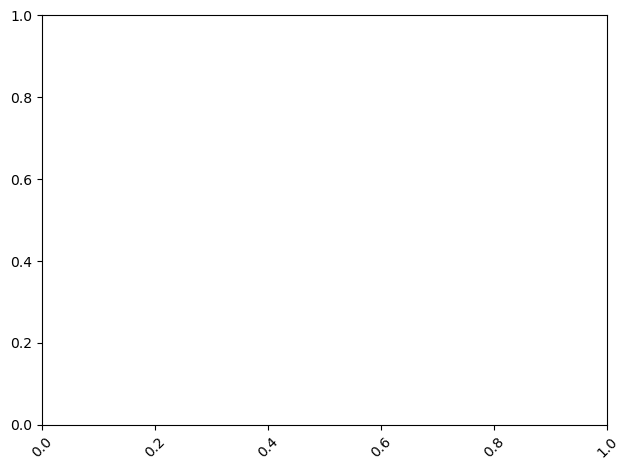

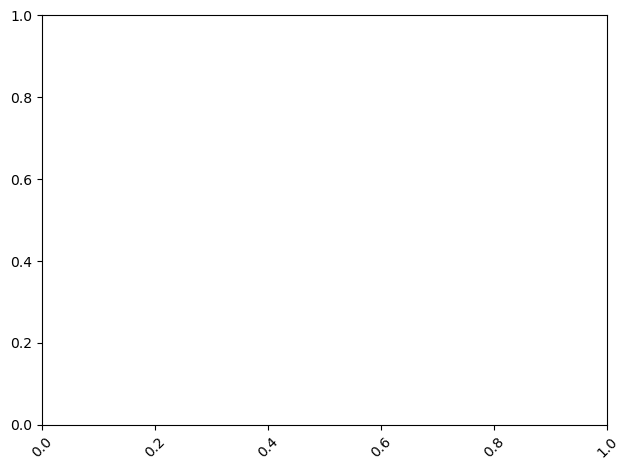

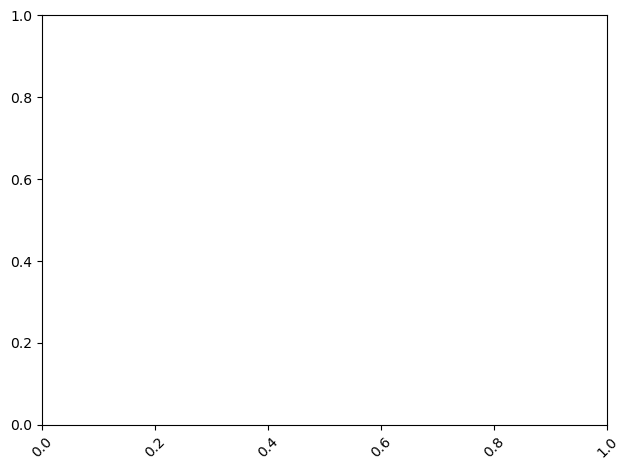

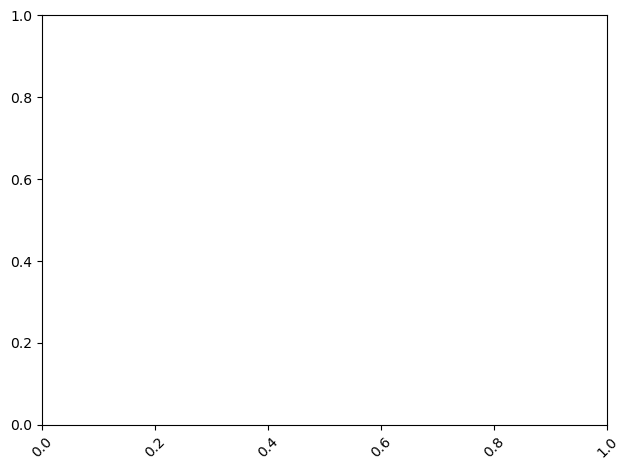

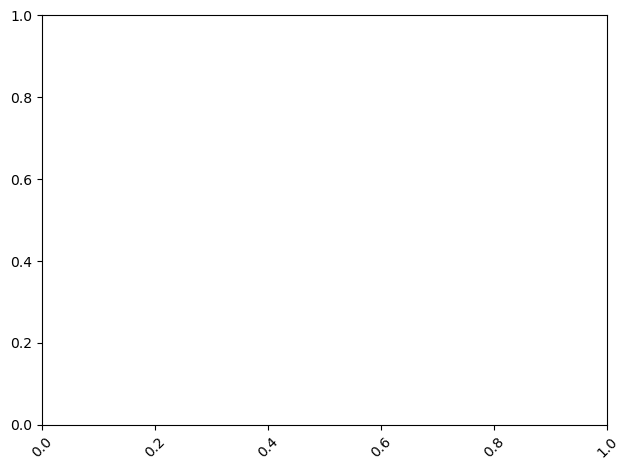

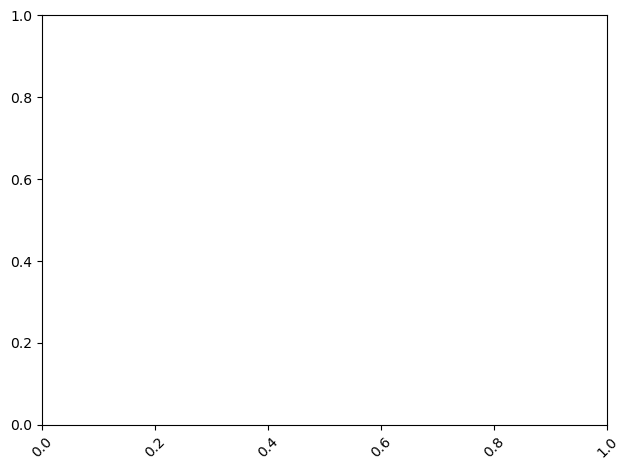

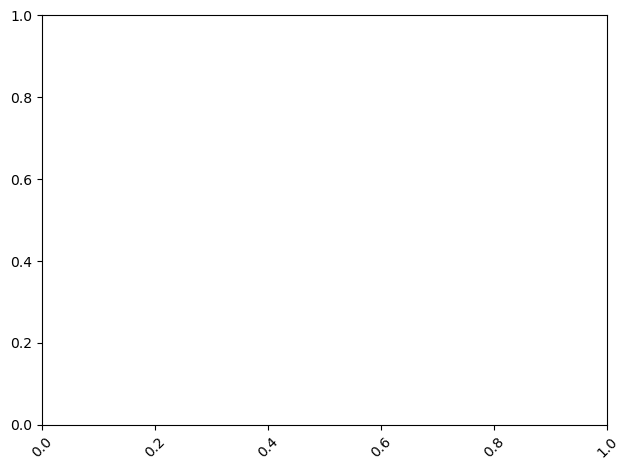

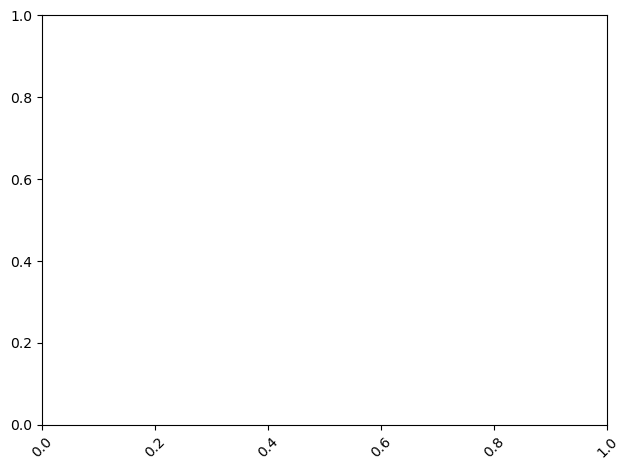

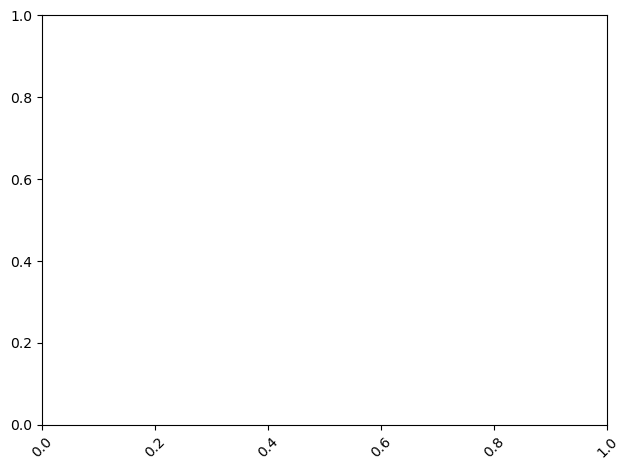

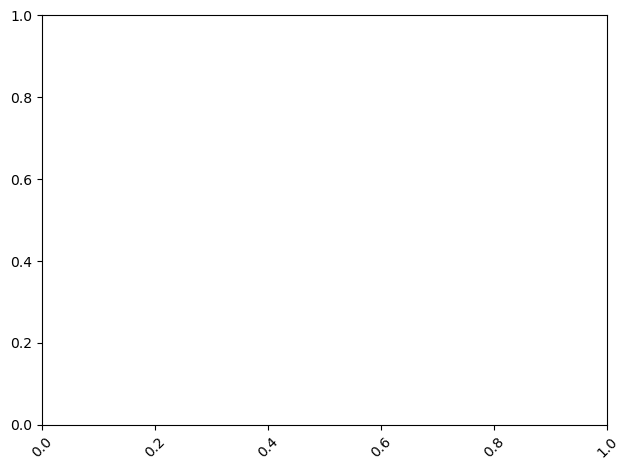

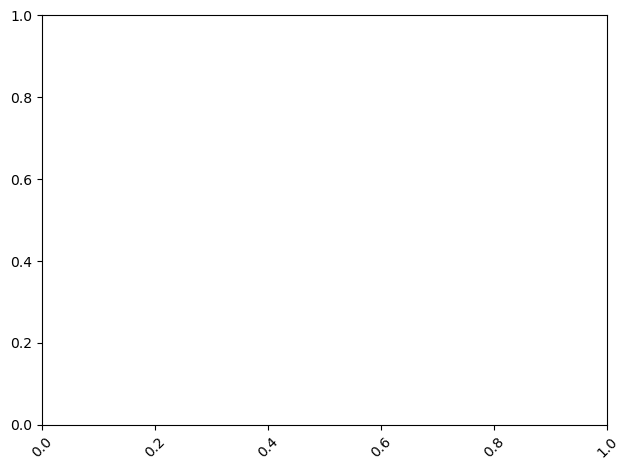

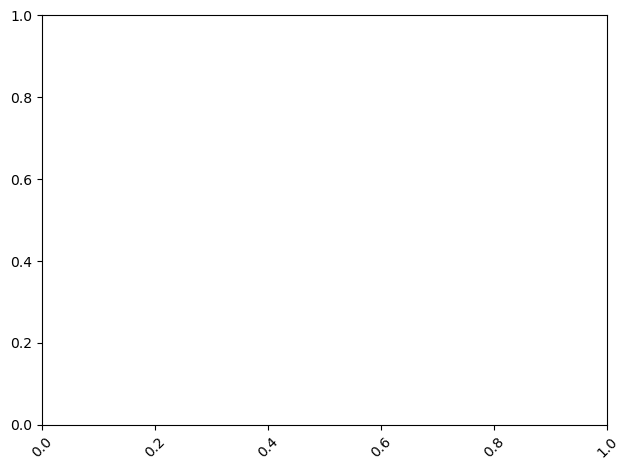

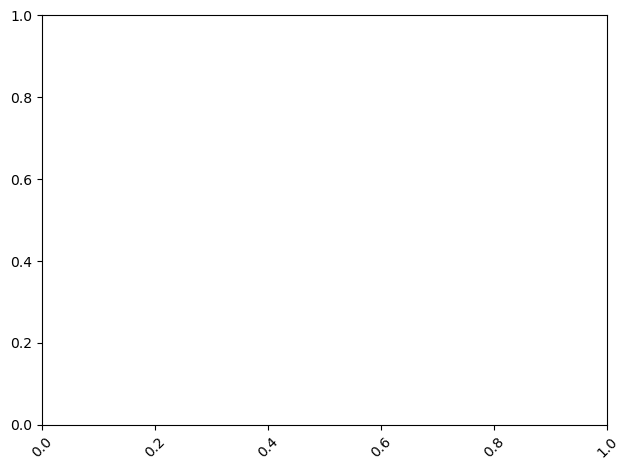

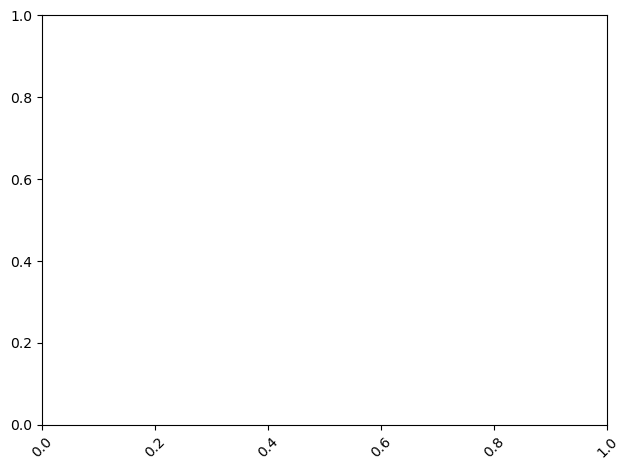

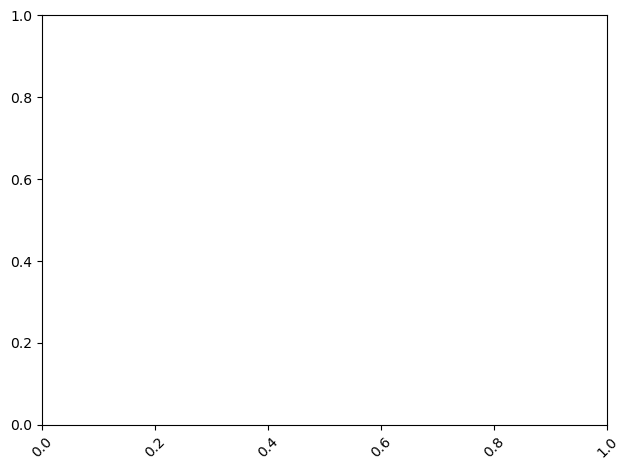

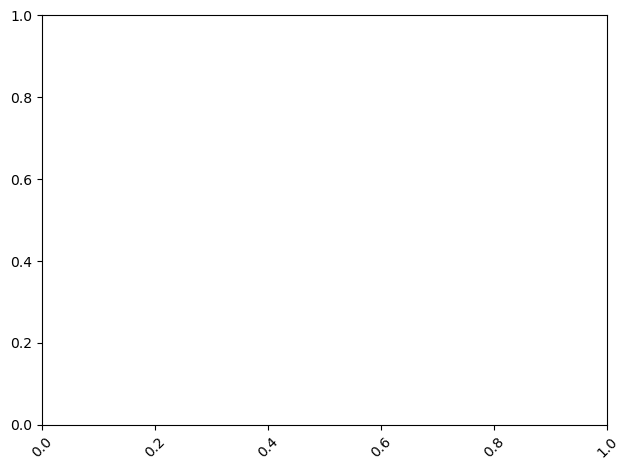

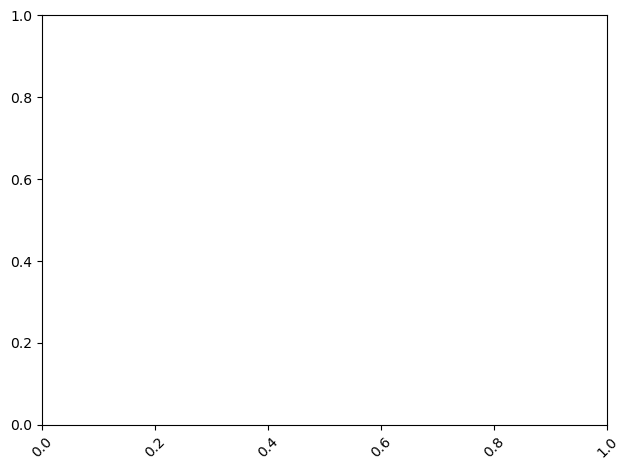

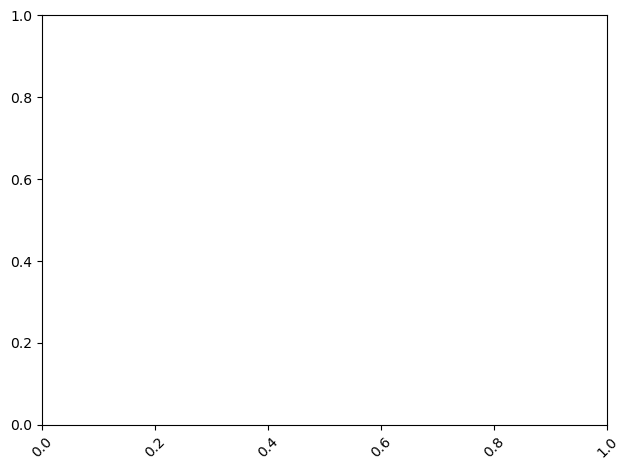

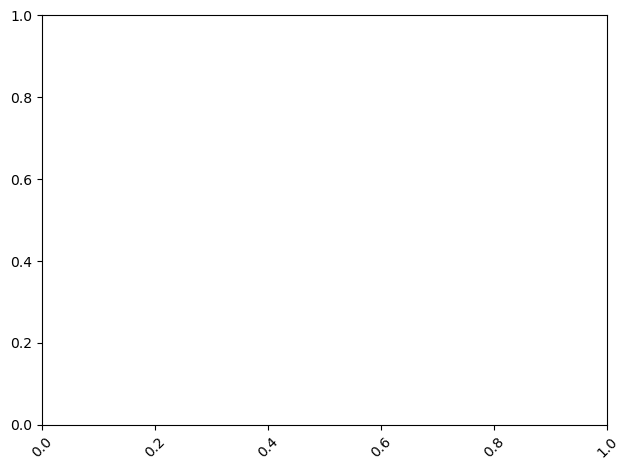

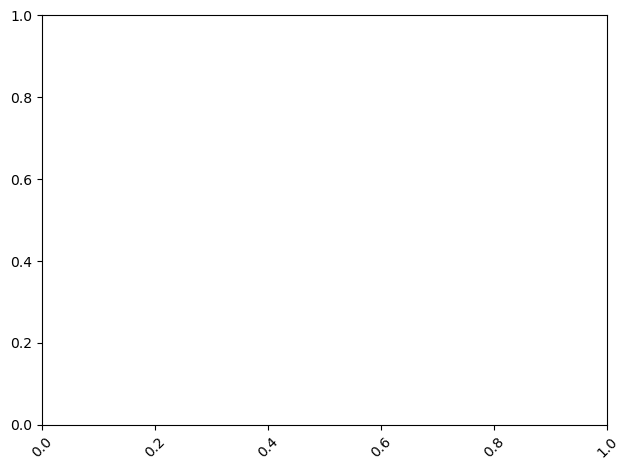

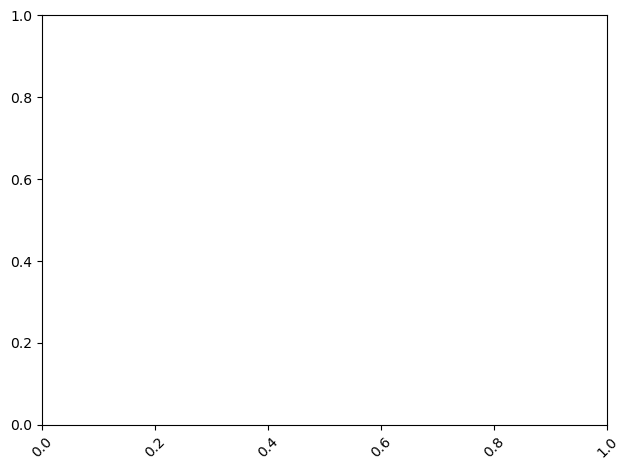

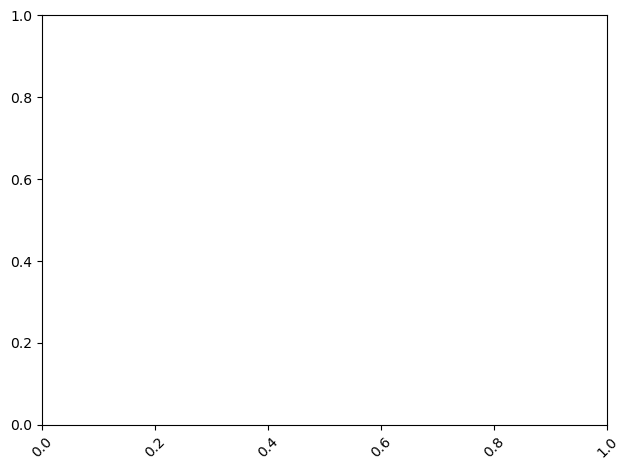

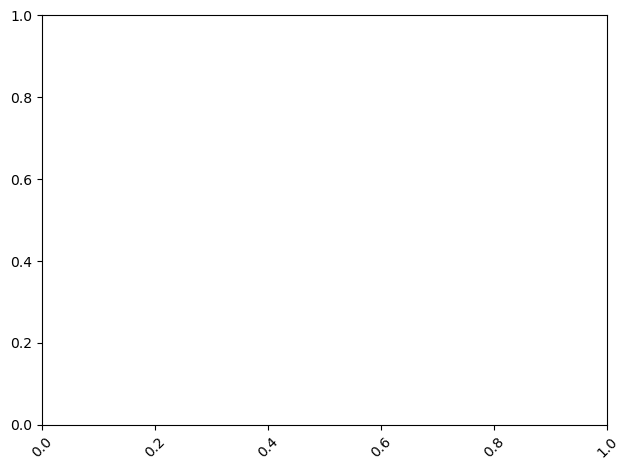

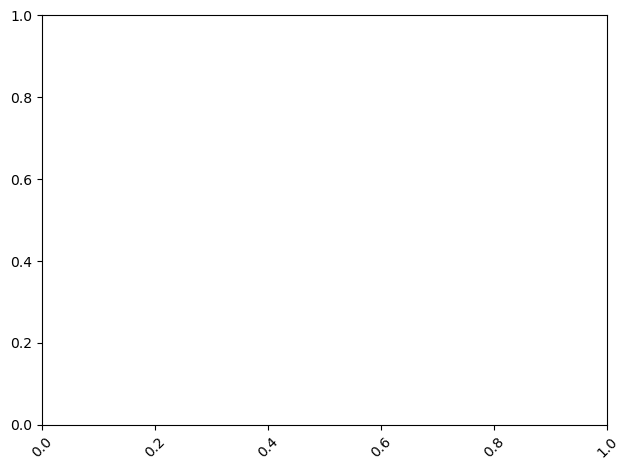

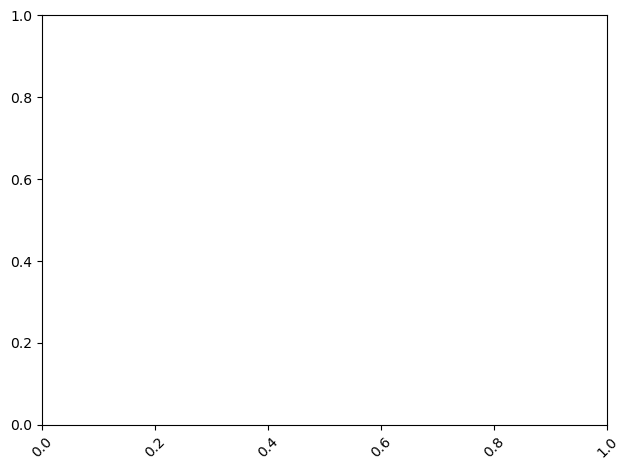

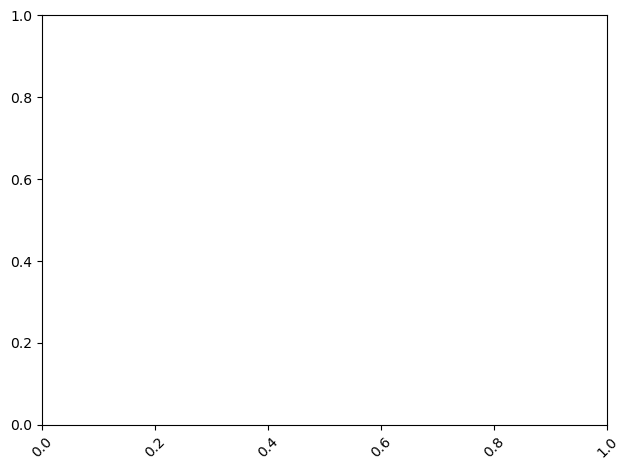

In [ ]:
import psutil
import time
import matplotlib.pyplot as plt
from collections import deque
from datetime import datetime

def display_disk_usage():
    max_points = 30  # Keep only the last 30 records
    timestamps = deque(maxlen=max_points)
    used_space = deque(maxlen=max_points)
    free_space = deque(maxlen=max_points)

    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    try:
        while True:
            # Get disk usage statistics
            disk_usage = psutil.disk_usage('/')

            # Append data with a fixed max length
            timestamps.append(datetime.now().strftime("%H:%M:%S"))
            used_space.append(disk_usage.used / (1024 ** 3))  # Convert to GB
            free_space.append(disk_usage.free / (1024 ** 3))  # Convert to GB

            # Clear the plot
            ax.clear()

            # Plot the data
            ax.plot(timestamps, used_space, label='Used Space (GB)', color='red')
            ax.plot(timestamps, free_space, label='Free Space (GB)', color='green')

            # Formatting the plot
            ax.set_xlabel('Time')
            ax.set_ylabel('Disk Space (GB)')
            ax.set_title('Real-Time Disk Usage')
            ax.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Force update the plot
            plt.draw()
            plt.pause(0.1)  # Small delay

            time.sleep(1)  # Reduce CPU usage
    except KeyboardInterrupt:
        print("\nMonitoring stopped.")
        plt.ioff()
        plt.show()  # Ensures final plot remains visible

if __name__ == "__main__":
    display_disk_usage()
